In [1]:
import pandas, numpy
import os
from IPython.display import display, HTML
import datetime, calendar
from plotly import express
import plotly.graph_objects as go
import matplotlib.pyplot as pltmp, seaborn as sbtmp
from sklearn import neighbors, ensemble,linear_model, neural_network, tree, svm
from sklearn import metrics, decomposition, model_selection, pipeline,preprocessing, feature_selection
from statsmodels.tsa.arima.model import ARIMA

import matplotlib
mtvl=[20,14,14,'#2554C7']
mt_ft=['axes.labelsize','xtick.labelsize','ytick.labelsize','text.color']
for f in range(len(mtvl)):
    matplotlib.rcParams[mt_ft[f]]=mtvl[f]
font = {'family' : 'serif',
        'size'   : 18}
matplotlib.rc('font', **font)

In [2]:
TmpChgDf=pandas.read_csv("FAOSTAT_data_en_11-1-2024.csv")
display(HTML(TmpChgDf.head().to_html()))

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1961,1961,°c,0.745,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1962,1962,°c,0.015,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1963,1963,°c,2.706,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1964,1964,°c,-5.250,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1965,1965,°c,1.854,E,Estimated value


In [3]:
EngCountries=['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'CzechRepublic', 'Denmark', 
              'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 
              'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'theNetherlands', 'Poland', 
              'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom of Great Britain and Northern Ireland']
MnthsData=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
TmpChgDf=TmpChgDf.loc[TmpChgDf['Area'].isin(EngCountries)].reset_index(drop=True)
TmpChgDf=TmpChgDf.loc[TmpChgDf['Months'].isin(MnthsData)].reset_index(drop=True)
TmpChgDf

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1961,1961,°c,-0.807,E,Estimated value
1,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1962,1962,°c,1.345,E,Estimated value
2,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1963,1963,°c,-5.065,E,Estimated value
3,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1964,1964,°c,-3.162,E,Estimated value
4,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1965,1965,°c,1.431,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,December,2019,2019,°c,1.285,E,Estimated value
16472,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,December,2020,2020,°c,0.652,E,Estimated value
16473,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,December,2021,2021,°c,1.428,E,Estimated value
16474,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,December,2022,2022,°c,-0.688,E,Estimated value


In [4]:
TmpChgDf['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [5]:
def TcnClean(tcn):
    print("==========================================")
    print("      Data Infomation")
    print("==========================================")
    print(tcn.info())
    print("===================================================")
    print("Missing Values Before Cleaning")
    print("===================================================")
    print(tcn.isnull().sum())
    tcnmsv=sum(tcn.isnull().sum())
    if tcnmsv>0:
        covob=tcn.dtypes[tcn.dtypes=='object'].index.tolist()
        covnm=tcn.dtypes[tcn.dtypes!='object'].index.tolist() 
        if sum(tcn.isna().sum())!=0:
            for x in covob:
                tcn[x]=tcn[x].fillna(tcn[x].mode()[0])
            for y in covnm:
                tcn[y]=tcn[y].fillna(tcn[y].mean())
        print("===================================================")
        print("      Missing Values (After Cleaning)")
        print("===================================================")
        print(tcn.isnull().sum())
    else:
        print("===================================================")
        print("      Data has no Missing Values ")
        print("===================================================")
    return tcn
TmpChgDfMS=TcnClean(TmpChgDf)

      Data Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       16476 non-null  object 
 1   Domain            16476 non-null  object 
 2   Area Code (M49)   16476 non-null  int64  
 3   Area              16476 non-null  object 
 4   Element Code      16476 non-null  int64  
 5   Element           16476 non-null  object 
 6   Months Code       16476 non-null  int64  
 7   Months            16476 non-null  object 
 8   Year Code         16476 non-null  int64  
 9   Year              16476 non-null  int64  
 10  Unit              16476 non-null  object 
 11  Value             16476 non-null  float64
 12  Flag              16476 non-null  object 
 13  Flag Description  16476 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.8+ MB
None
Missing Values Before Cleaning
Domain Code        

## Data Analytics

         Area     Value
0  Luxembourg  1.620576
1     Belgium  1.563750
2     Estonia  1.551352
3    Slovenia  1.535167
4      Latvia  1.525042
5   Lithuania  1.482896
6     Croatia  1.382987
7    Slovakia  1.273586
8     Austria  0.848000
9     Finland  0.810856


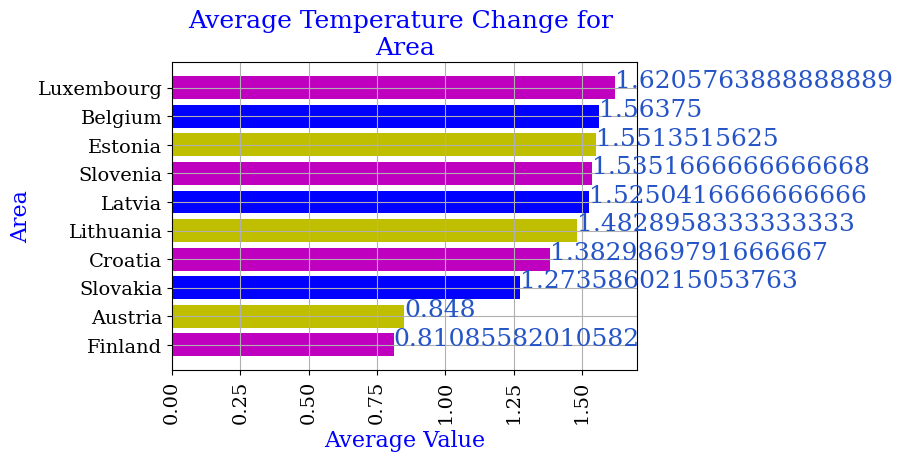

      Months     Value
0    January  0.987692
1      March  0.975591
2     August  0.974635
3   February  0.971387
4       July  0.965931
5      April  0.843393
6        May  0.791655
7       June  0.740615
8    October  0.636482
9  September  0.594165


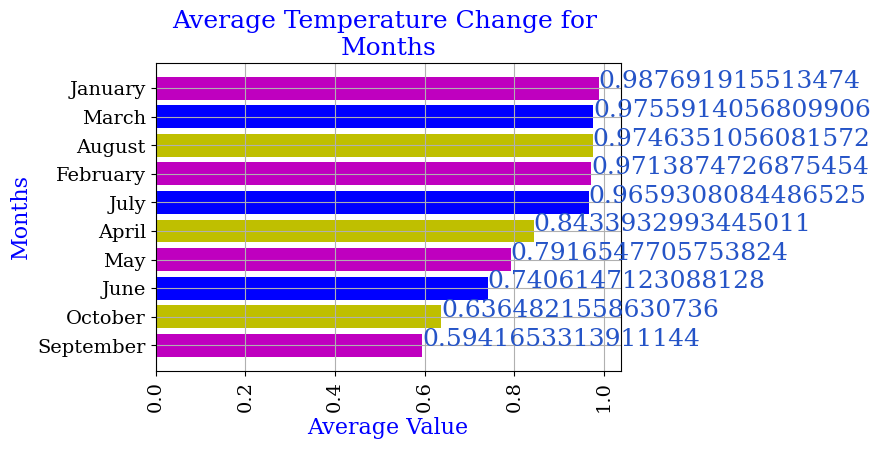

In [6]:
def VisualData(tcn,c1,c2):
    df=tcn.groupby(["{}".format(c1)]).agg({"{}".format(c2): [numpy.mean]}).sort_values(by=("{}".format(c2),"mean"),ascending=False).iloc[:10]
    fet=df.index.tolist()
    val=df.values.flatten()
    df1=pandas.DataFrame({
        "{}".format(c1):fet,
        "{}".format(c2):val
    })
    print(df1)
    df1=df1.sort_values(by="{}".format(c2),ascending=True)
    pltmp.figure(figsize=(6,4))
    pltmp.title("Average Temperature Change for \n{}".format(c1),fontsize=18,color="b")
    pltmp.barh(df1["{}".format(c1)],df1["{}".format(c2)],color=["m","y","b"])
    pltmp.xticks(rotation=90)
    pltmp.xlabel("Average {}".format(c2),fontsize=16,color="b")
    pltmp.ylabel("{}".format(c1),fontsize=16,color="b")
    for df1_id, df1_val in enumerate(df1["{}".format(c2)]):
        pltmp.text(df1_val, df1_id, str(df1_val))
    pltmp.grid()
    pltmp.show()
VisualData(TmpChgDf,"Area","Value")
VisualData(TmpChgDf,"Months","Value")

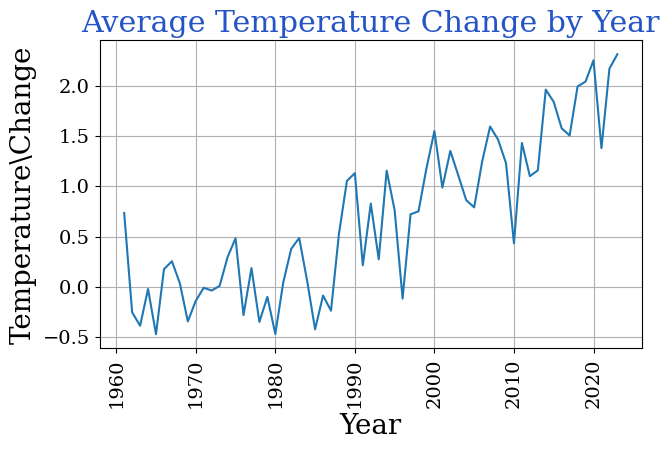

,Average Temperature Change
Year,
1961,0.734241
1962,-0.254181
1963,-0.387639
1964,-0.021819
1965,-0.471796
...,...
2019,2.040888
2020,2.252763
2021,1.378728


In [7]:
YrUn=TmpChgDf['Year'].unique()
YrTmmn=[]
for yr in YrUn:
    yrdf=TmpChgDf[TmpChgDf['Year Code']==yr].reset_index(drop=True)
    YrTmmn.append(yrdf['Value'].mean())
YrMnDf=pandas.DataFrame({
    "Year":YrUn,
    "Average Temperature Change":YrTmmn
})
YrMnDf=YrMnDf.set_index('Year')
pltmp.figure(figsize=(7,4))
pltmp.plot(YrMnDf.index,YrMnDf["Average Temperature Change"])
pltmp.title("Average Temperature Change by Year")
pltmp.xlabel("Year")
pltmp.ylabel("Temperature\Change")
pltmp.xticks(rotation=90)
pltmp.grid()
pltmp.show()
YrMnDf

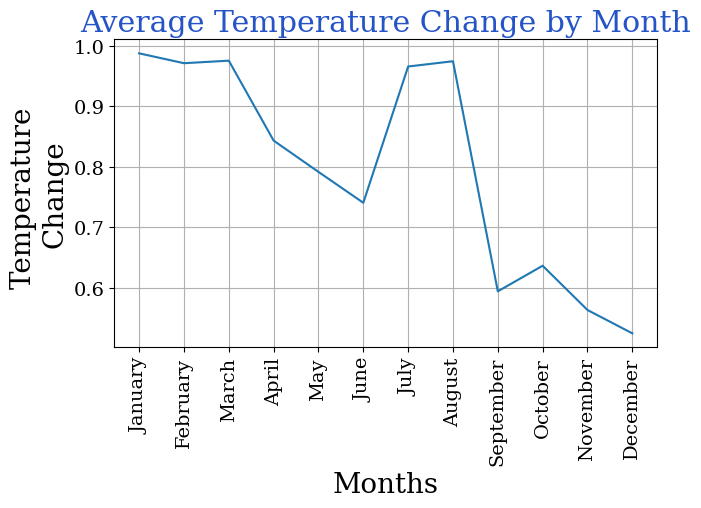

,Average Temperature Change
Month,
January,0.987692
February,0.971387
March,0.975591
April,0.843393
May,0.791655
June,0.740615
July,0.965931
August,0.974635
September,0.594165


In [8]:
MnUn=TmpChgDf['Months'].unique()[:12]
MnTmmn=[]
for Mn in MnUn:
    Mndf=TmpChgDf[TmpChgDf['Months']==Mn].reset_index(drop=True)
    MnTmmn.append(Mndf['Value'].mean())
MnMnDf=pandas.DataFrame({
    "Month":MnUn,
    "Average Temperature Change":MnTmmn
})
MnMnDf=MnMnDf.set_index('Month')
pltmp.figure(figsize=(7,4))
pltmp.plot(MnMnDf.index,MnMnDf["Average Temperature Change"])
pltmp.title("Average Temperature Change by Month")
pltmp.xlabel("Months")
pltmp.ylabel("Temperature \nChange")
pltmp.xticks(rotation=90)
pltmp.grid()
pltmp.show()
MnMnDf

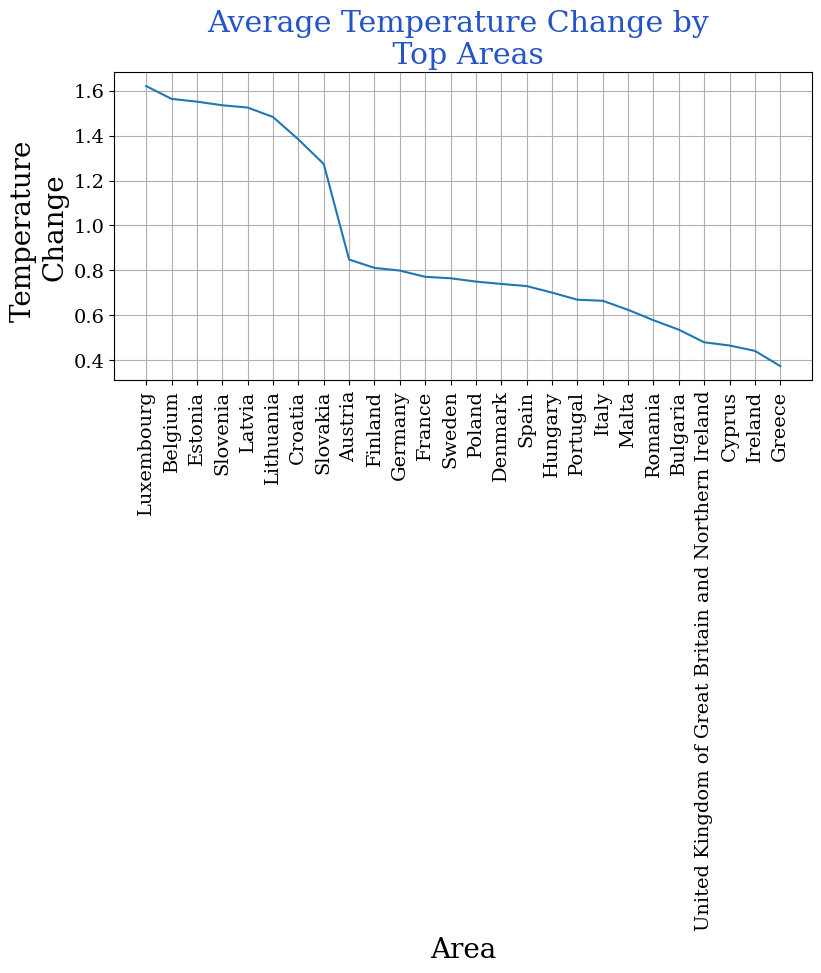

,Average Temperature Change
Area,
Luxembourg,1.620576
Belgium,1.563750
Estonia,1.551352
Slovenia,1.535167
Latvia,1.525042
Lithuania,1.482896
Croatia,1.382987
Slovakia,1.273586
Austria,0.848000


In [9]:
AreaUn=TmpChgDf['Area'].unique()
AreaTmmn=[]
for Area in AreaUn:
    Areadf=TmpChgDf[TmpChgDf['Area']==Area].reset_index(drop=True)
    AreaTmmn.append(Areadf['Value'].mean())
AreaMnDf=pandas.DataFrame({
    "Area":AreaUn,
    "Average Temperature Change":AreaTmmn
})
AreaMnDfT20=AreaMnDf.sort_values(by="Average Temperature Change",ascending=False)
AreaMnDfT20=AreaMnDfT20.iloc[:30].set_index('Area')
pltmp.figure(figsize=(9,4))
pltmp.plot(AreaMnDfT20.index,AreaMnDfT20["Average Temperature Change"])
pltmp.title("Average Temperature Change by \n Top Areas")
pltmp.xlabel("Area")
pltmp.ylabel("Temperature \nChange")
pltmp.xticks(rotation=90)
pltmp.grid()
pltmp.show()
AreaMnDfT20

In [10]:
DummyMnDf=pandas.get_dummies(TmpChgDf['Months'],dtype=int)
DummyMnDf

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16471,0,0,1,0,0,0,0,0,0,0,0,0
16472,0,0,1,0,0,0,0,0,0,0,0,0
16473,0,0,1,0,0,0,0,0,0,0,0,0
16474,0,0,1,0,0,0,0,0,0,0,0,0


In [11]:
TmpChgDf1 = pandas.concat([TmpChgDf, DummyMnDf], axis=1)
TmpChgDf1.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,...,December,February,January,July,June,March,May,November,October,September
0,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1961,1961,...,0,0,1,0,0,0,0,0,0,0
1,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1962,1962,...,0,0,1,0,0,0,0,0,0,0
2,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1963,1963,...,0,0,1,0,0,0,0,0,0,0
3,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1964,1964,...,0,0,1,0,0,0,0,0,0,0
4,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1965,1965,...,0,0,1,0,0,0,0,0,0,0


In [12]:
DummyFDDf=pandas.get_dummies(TmpChgDf1['Flag Description'],dtype=int)
TmpChgDf2 = pandas.concat([TmpChgDf1, DummyFDDf], axis=1)
TmpChgDf2.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,...,February,January,July,June,March,May,November,October,September,Estimated value
0,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1961,1961,...,0,1,0,0,0,0,0,0,0,1
1,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1962,1962,...,0,1,0,0,0,0,0,0,0,1
2,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1963,1963,...,0,1,0,0,0,0,0,0,0,1
3,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1964,1964,...,0,1,0,0,0,0,0,0,0,1
4,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,January,1965,1965,...,0,1,0,0,0,0,0,0,0,1


In [13]:
mnun=TmpChgDf2['Months'].unique()
yrun=TmpChgDf2['Year'].unique()
dtsall=[]
for y in yrun:
    for m in mnun:
        dtv=0
        df=TmpChgDf2[(TmpChgDf2['Months']==m)&(TmpChgDf2['Year']==y)].reset_index(drop=True)
        for d in range(len(df)):
            dtv+=1
            dtsall.append(dtv)
try:
    TmpChgDf2=TmpChgDf2.drop('Day',axis=1)
    TmpChgDf2.insert(7,'Day',dtsall)
except:
    TmpChgDf2.insert(7,'Day',dtsall)
MonthV={'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7','August':'8', 'September':'9', 'October':'10', 'November':'11', 'December':'12'}
MnAct=TmpChgDf2['Months']
TmpChgDf2=TmpChgDf2.replace(MonthV)
TmpChgDf2

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Day,Months,Year Code,...,February,January,July,June,March,May,November,October,September,Estimated value
0,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,1,1,1961,...,0,1,0,0,0,0,0,0,0,1
1,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,2,1,1962,...,0,1,0,0,0,0,0,0,0,1
2,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,3,1,1963,...,0,1,0,0,0,0,0,0,0,1
3,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,4,1,1964,...,0,1,0,0,0,0,0,0,0,1
4,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,5,1,1965,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,22,12,2019,...,0,0,0,0,0,0,0,0,0,1
16472,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,23,12,2020,...,0,0,0,0,0,0,0,0,0,1
16473,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,24,12,2021,...,0,0,0,0,0,0,0,0,0,1
16474,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,25,12,2022,...,0,0,0,0,0,0,0,0,0,1


In [14]:
dt_list=TmpChgDf2['Day']
mn_list=TmpChgDf2['Months']
yr_list=TmpChgDf2['Year']
dateformat=[]
for yd in range(len(dt_list)):
    dateformat.append('{}'.format(dt_list[yd])+'-{}'.format(mn_list[yd])+'-{}'.format(yr_list[yd]))
try:
    TmpChgDf2=TmpChgDf2.drop('Date',axis=1)
    TmpChgDf2.insert(7,'Date',dateformat)
except:
    TmpChgDf2.insert(7,'Date',dateformat)
TmpChgDf2

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Date,Day,Months,...,February,January,July,June,March,May,November,October,September,Estimated value
0,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,1-1-1961,1,1,...,0,1,0,0,0,0,0,0,0,1
1,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,2-1-1962,2,1,...,0,1,0,0,0,0,0,0,0,1
2,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,3-1-1963,3,1,...,0,1,0,0,0,0,0,0,0,1
3,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,4-1-1964,4,1,...,0,1,0,0,0,0,0,0,0,1
4,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,5-1-1965,5,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,22-12-2019,22,12,...,0,0,0,0,0,0,0,0,0,1
16472,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,23-12-2020,23,12,...,0,0,0,0,0,0,0,0,0,1
16473,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,24-12-2021,24,12,...,0,0,0,0,0,0,0,0,0,1
16474,ET,Temperature change on land,826,United Kingdom of Great Britain and Northern I...,7271,Temperature change,7012,25-12-2022,25,12,...,0,0,0,0,0,0,0,0,0,1


In [15]:
TmpChgDf2['Value_Mean']=TmpChgDf2.Value.rolling(3, win_type ='triang').sum().fillna(TmpChgDf2.Value.rolling(3, win_type ='triang').sum().mean()).tolist()
TmpChgDf2['Value_Median']=TmpChgDf2.Value.rolling(3, win_type ='triang').sum().fillna(TmpChgDf2.Value.rolling(3, win_type ='triang').sum().median()).tolist()
TmpChgDf2['Value_Std']=TmpChgDf2.Value.rolling(3, win_type ='triang').sum().fillna(TmpChgDf2.Value.rolling(3, win_type ='triang').sum().std()).tolist()
TmpChgDf2.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Date,Day,Months,...,June,March,May,November,October,September,Estimated value,Value_Mean,Value_Median,Value_Std
0,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,1-1-1961,1,1,...,0,0,0,0,0,0,1,1.595001,1.52025,2.464977
1,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,2-1-1962,2,1,...,0,0,0,0,0,0,1,1.595001,1.52025,2.464977
2,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,3-1-1963,3,1,...,0,0,0,0,0,0,1,-1.591000,-1.59100,-1.591000
3,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,4-1-1964,4,1,...,0,0,0,0,0,0,1,-5.973500,-5.97350,-5.973500
4,ET,Temperature change on land,40,Austria,7271,Temperature change,7001,5-1-1965,5,1,...,0,0,0,0,0,0,1,-4.979000,-4.97900,-4.979000


In [16]:
def DataEnc(tcn):
    tcn1=tcn.copy()
    print("Feature Types Before Encoding")
    print(tcn1.info())
    obtcn=tcn1.dtypes[tcn1.dtypes=='object'].index.tolist()
    for l in obtcn:
        tcn1[l]=tcn1[l].replace(tcn1[l].unique(),[x for x in range(len(tcn1[l].unique()))]) 
    print("Feature Types After Encoding")
    print(tcn1.info())
    return tcn1
TmpChgDf2_encoded=DataEnc(TmpChgDf2)
TmpChgDf2_encoded.head()

Feature Types Before Encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       16476 non-null  object 
 1   Domain            16476 non-null  object 
 2   Area Code (M49)   16476 non-null  int64  
 3   Area              16476 non-null  object 
 4   Element Code      16476 non-null  int64  
 5   Element           16476 non-null  object 
 6   Months Code       16476 non-null  int64  
 7   Date              16476 non-null  object 
 8   Day               16476 non-null  int64  
 9   Months            16476 non-null  object 
 10  Year Code         16476 non-null  int64  
 11  Year              16476 non-null  int64  
 12  Unit              16476 non-null  object 
 13  Value             16476 non-null  float64
 14  Flag              16476 non-null  object 
 15  Flag Description  16476 non-null  object 
 16  April     

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Date,Day,Months,...,June,March,May,November,October,September,Estimated value,Value_Mean,Value_Median,Value_Std
0,0,0,40,0,7271,0,7001,0,1,0,...,0,0,0,0,0,0,1,1.595001,1.52025,2.464977
1,0,0,40,0,7271,0,7001,1,2,0,...,0,0,0,0,0,0,1,1.595001,1.52025,2.464977
2,0,0,40,0,7271,0,7001,2,3,0,...,0,0,0,0,0,0,1,-1.591000,-1.59100,-1.591000
3,0,0,40,0,7271,0,7001,3,4,0,...,0,0,0,0,0,0,1,-5.973500,-5.97350,-5.973500
4,0,0,40,0,7271,0,7001,4,5,0,...,0,0,0,0,0,0,1,-4.979000,-4.97900,-4.979000
